# Stellar Warp Project (Honkai Star Rail)
This is a small project of mine carrying out data analysis on a gacha game called Honkai Star Rail. It mainly analyzes my roll history and see if the data are accurate compared to the official gacha rates :)

Most of the stuffs are already done on [this website](https://starrailstation.com/en/warp#char_event) (Excel warp file is also generated from here), but I still wanna try doing it using my own codes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

![separator2](https://i.imgur.com/4gX5WFr.png)

First we make a summary on the standard gacha banner:

In [2]:
summary = pd.read_excel(
    'data/starrailstation-warp-data.xlsx',
    'Banners'
)
summary

,Type,Name,Rate UP,Warps,5★,RateUP%,AVG Pity 5★,4★,AVG Pity 4★,Start Time,End Time
0,Stellar Warp,Stellar Warp,NaN,353,6,NaN,50.833333,42,8.333333,NaT,NaT
1,Character Event Warp,Butterfly on Swordtip,Seele,72,0,NaN,0.000000,11,6.545455,2023-04-25 21:00:00,2023-05-17 10:00:00
2,Character Event Warp,Swirl of Heavenly Spear,Jing Yuan,36,1,1.0,78.000000,4,8.250000,2023-05-16 21:00:00,2023-06-06 21:00:00
3,Character Event Warp,Contract Zero,Silver Wolf,69,1,0.0,48.000000,10,6.400000,2023-06-06 21:00:00,2023-06-28 00:00:00
4,Character Event Warp,Laic Pursuit,Luocha,44,2,1.0,43.000000,6,7.666667,2023-06-27 00:00:00,2023-07-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
57,Light Cone Event Warp,Brilliant Fixation,Flowing Nightglow,0,0,NaN,0.000000,0,0.000000,2024-05-07 23:59:00,2024-05-29 12:00:00
58,Light Cone Event Warp,Bygone Reminiscence #2,"Worrisome, Blissful",0,0,NaN,0.000000,0,0.000000,2024-05-07 23:59:00,2024-05-29 12:00:00
59,Light Cone Event Warp,Brilliant Fixation,Sailing Towards a Second Life,10,2,0.0,5.500000,1,10.000000,2024-05-28 20:59:00,2024-06-18 00:00:00
60,Light Cone Event Warp,Bygone Reminiscence #2,She Already Shut Her Eyes,0,0,NaN,0.000000,0,0.000000,2024-05-28 20:59:00,2024-06-18 00:00:00


In [3]:
# rename some columns
summary.rename(columns = {'5★':'5-Star', '4★':'4-Star', 'AVG Pity 5★':'AVG Pity 5-Star', 'AVG Pity 4★':'AVG Pity 4-Star'},
               inplace = True)
# datetime object
summary[['Start Time', 'End Time']] = summary[['Start Time', 'End Time']].apply(pd.to_datetime)
summary

,Type,Name,Rate UP,Warps,5-Star,RateUP%,AVG Pity 5-Star,4-Star,AVG Pity 4-Star,Start Time,End Time
0,Stellar Warp,Stellar Warp,NaN,353,6,NaN,50.833333,42,8.333333,NaT,NaT
1,Character Event Warp,Butterfly on Swordtip,Seele,72,0,NaN,0.000000,11,6.545455,2023-04-25 21:00:00,2023-05-17 10:00:00
2,Character Event Warp,Swirl of Heavenly Spear,Jing Yuan,36,1,1.0,78.000000,4,8.250000,2023-05-16 21:00:00,2023-06-06 21:00:00
3,Character Event Warp,Contract Zero,Silver Wolf,69,1,0.0,48.000000,10,6.400000,2023-06-06 21:00:00,2023-06-28 00:00:00
4,Character Event Warp,Laic Pursuit,Luocha,44,2,1.0,43.000000,6,7.666667,2023-06-27 00:00:00,2023-07-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
57,Light Cone Event Warp,Brilliant Fixation,Flowing Nightglow,0,0,NaN,0.000000,0,0.000000,2024-05-07 23:59:00,2024-05-29 12:00:00
58,Light Cone Event Warp,Bygone Reminiscence #2,"Worrisome, Blissful",0,0,NaN,0.000000,0,0.000000,2024-05-07 23:59:00,2024-05-29 12:00:00
59,Light Cone Event Warp,Brilliant Fixation,Sailing Towards a Second Life,10,2,0.0,5.500000,1,10.000000,2024-05-28 20:59:00,2024-06-18 00:00:00
60,Light Cone Event Warp,Bygone Reminiscence #2,She Already Shut Her Eyes,0,0,NaN,0.000000,0,0.000000,2024-05-28 20:59:00,2024-06-18 00:00:00


Now I visualize my rolls on the standard banner (Stellar Warp).

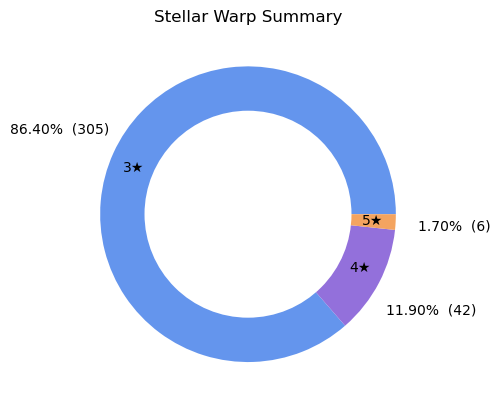

In [4]:
std_roll = summary[summary['Type'] == 'Stellar Warp']
# 3,4,5 stars
stdstat = pd.concat([std_roll['Warps'] - std_roll['5-Star'] - std_roll['4-Star'], std_roll['4-Star'], std_roll['5-Star']])
stdstat_label = '3★', '4★', '5★'
rarity_color = ['cornflowerblue', 'mediumpurple', 'sandybrown'] # this can be used on other future graphs
stdstat = stdstat.to_numpy() # this turns dataframe to array so i can use the function below

# autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100)
# prints 'percent (value)' format in autopct

fig, ax = plt.subplots()
ax.pie(stdstat,
       labels=stdstat_label,
       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(stdstat)/100),
       colors=rarity_color,
       pctdistance=1.4, labeldistance=0.77) # swap position of label and percent
ax.set_title('Stellar Warp Summary')

# This is stupid but it works: make a white circle so it becomes a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

So now we proceed to Character Event Banner roll history:

In [5]:
limited = pd.read_excel(
    'data/starrailstation-warp-data.xlsx',
    'Character Event Warp'
)
limited['Time'] = pd.to_datetime(limited['Time'])
limited

,#No,Rarity,Item,Pity,Time,Banner,(dev)JSON
0,1,★★★,Arrows,NaN,2023-04-26 15:12:03,Butterfly on Swordtip,"20000,false,2003"
1,2,★★★,Collapsing Sky,NaN,2023-04-26 15:12:21,Butterfly on Swordtip,"20002,false,2003"
2,3,★★★,Defense,NaN,2023-04-26 15:12:21,Butterfly on Swordtip,"20010,false,2003"
3,4,★★★,Sagacity,NaN,2023-04-26 15:12:21,Butterfly on Swordtip,"20020,false,2003"
4,5,★★★,Shattered Home,NaN,2023-04-26 15:12:21,Butterfly on Swordtip,"20009,false,2003"
...,...,...,...,...,...,...,...
1053,1054,★★★,Arrows,NaN,2024-05-08 04:52:53,Just Intonation,"20000,false,2029"
1054,1055,★★★,Arrows,NaN,2024-05-08 04:52:53,Just Intonation,"20000,false,2029"
1055,1056,★★★,Void,NaN,2024-05-08 04:52:59,Just Intonation,"20004,false,2029"
1056,1057,★★★,Meshing Cogs,NaN,2024-05-08 04:53:03,Just Intonation,"20012,false,2029"


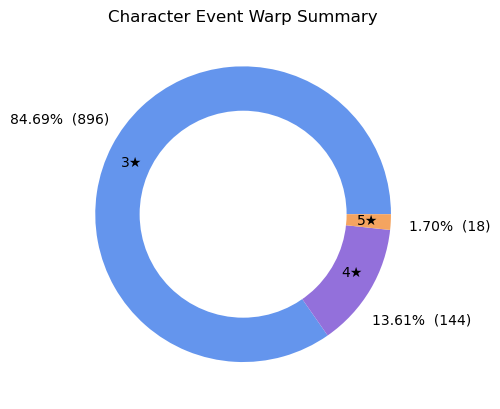

In [6]:
limstat = limited['Rarity'].value_counts()
# 3,4,5 stars
limstat_label = '3★', '4★', '5★'
rarity_color = ['cornflowerblue', 'mediumpurple', 'sandybrown'] # this can be used on other future graphs
limstat = limstat.to_numpy() # this turns dataframe to array so i can use the function below

# autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100)
# prints 'percent (value)' format in autopct

fig, ax = plt.subplots()
ax.pie(limstat,
       labels=limstat_label,
       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(limstat)/100),
       colors=rarity_color,
       pctdistance=1.4, labeldistance=0.77) # swap position of label and percent
ax.set_title('Character Event Warp Summary')

# This is stupid but it works: make a white circle so it becomes a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Before next part, lets get the history of weapon banner as well:

In [7]:
weapon = pd.read_excel(
    'data/starrailstation-warp-data.xlsx',
    'Light Cone Event Warp'
)
weapon['Time'] = pd.to_datetime(limited['Time'])
lcstat = weapon['Rarity'].value_counts()
lcstat

★★★      74
★★★★     12
★★★★★     4
Name: Rarity, dtype: int64

In [8]:
lcstat = lcstat.to_numpy()

![separator2](https://i.imgur.com/4gX5WFr.png)

Apparently there are three banners: Standatd Banner, Character Event Banner and Light Cone Banner.
Here I group the three pie charts together:

Text(0.5, 1.0, 'Light Cone Event Warp Summary')

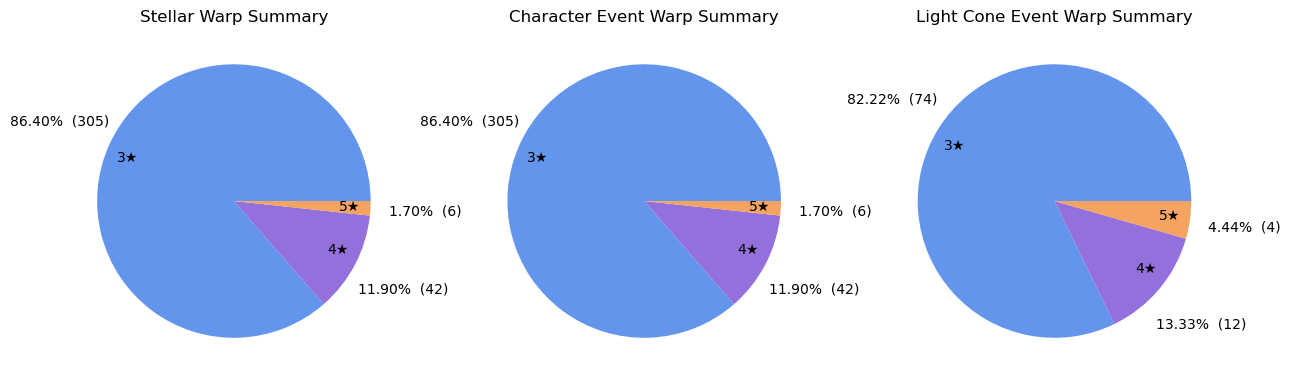

In [9]:
# Commonly shared attributes
rarity_label = '3★', '4★', '5★'
rarity_color = ['cornflowerblue', 'mediumpurple', 'sandybrown'] # this can be used on other future graphs

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 5))

# Standard
ax1.pie(stdstat,
       labels=rarity_label,
       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(stdstat)/100),
       colors=rarity_color,
       pctdistance=1.4, labeldistance=0.77) # swap position of label and percent
ax1.set_title('Stellar Warp Summary')

# Character Event
ax2.pie(stdstat,
       labels=rarity_label,
       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(stdstat)/100),
       colors=rarity_color,
       pctdistance=1.4, labeldistance=0.77) # swap position of label and percent
ax2.set_title('Character Event Warp Summary')

# Light Cone
ax3.pie(lcstat,
       labels=rarity_label,
       autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(lcstat)/100),
       colors=rarity_color,
       pctdistance=1.4, labeldistance=0.77) # swap position of label and percent
ax3.set_title('Light Cone Event Warp Summary')

![separator2](https://i.imgur.com/4gX5WFr.png)

Now I visualize the pity (how much rolls did I spend on each banner to get the desired character / item) on each banner:

In [10]:
charpity = summary[summary['Type'] == 'Character Event Warp']
lcpity = summary[summary['Type'] == 'Light Cone Event Warp']
charpity.set_index('Rate UP', inplace=True) # Turn index to character names
lcpity.set_index('Rate UP', inplace=True)
charpity = charpity['Warps'][charpity['Warps'] != 0].sort_values(ascending = False)
lcpity = lcpity['Warps'][lcpity['Warps'] != 0].sort_values(ascending = False)
charpity

Rate UP
Ruan Mei                      136
Topaz & Numby                 131
Black Swan                    130
Robin                         122
Seele                          72
Silver Wolf                    69
Dan Heng • Imbibitor Lunae     69
Kafka                          64
Fu Xuan                        54
Luocha                         44
Sparkle                        37
Jing Yuan                      36
Silver Wolf                    30
Aventurine                     23
Argenti                        20
Acheron                        20
Boothill                        1
Name: Warps, dtype: int64

Text(0, 0.5, '')

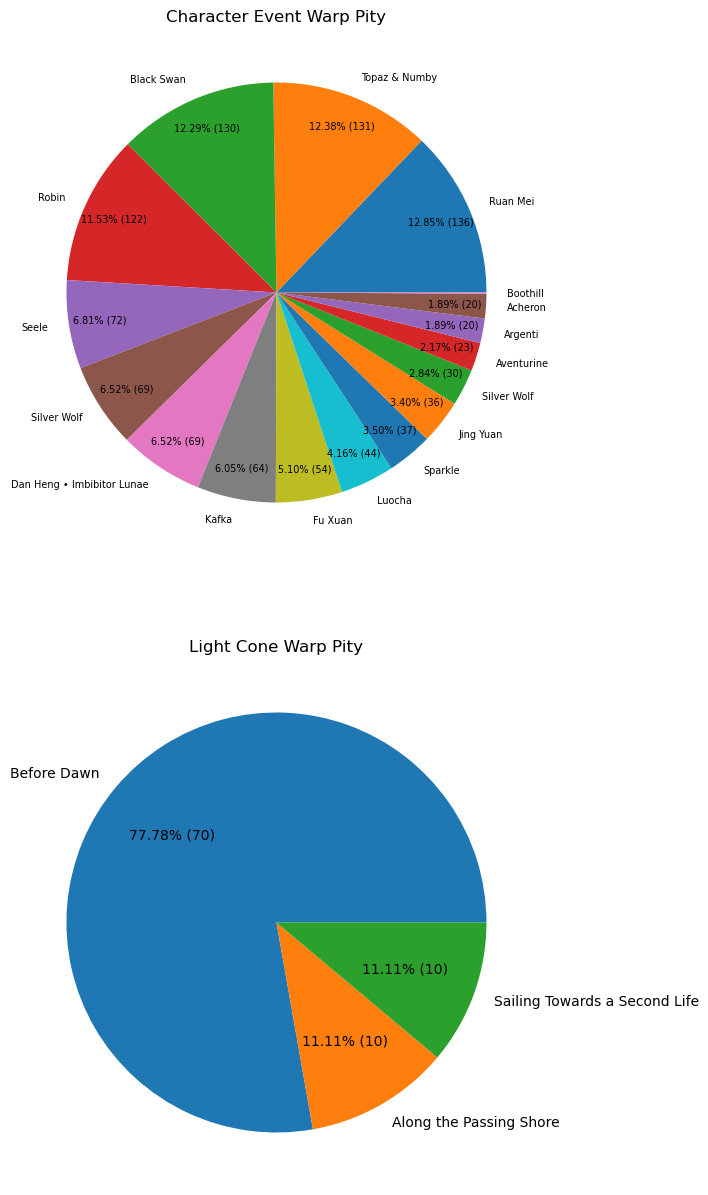

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(7,15))

def autopct_ax1(p):
    count = p * sum(charpity) / 100
    return '{:.2f}% ({:,.0f})'.format(p, count) if p >= 1.5 else ''
def autopct_ax2(p):
    count = p * sum(lcpity) / 100
    return '{:.2f}% ({:,.0f})'.format(p, count) if p >= 1.5 else ''

# define ax1 ax2 inside plot()
charpity.plot(kind='pie', 
              ax=ax1,
              autopct=autopct_ax1,
              textprops={'fontsize': 7}, # this is to make pct less cramped
              pctdistance=0.85, labeldistance=1.1)
ax1.set_title('Character Event Warp Pity')
ax1.set_ylabel('')

lcpity.plot(kind='pie', 
            ax=ax2,
            autopct=autopct_ax2,
            textprops={'fontsize': 10}, # this is to make pct less cramped
            pctdistance=0.65, labeldistance=1.1)
ax2.set_title('Light Cone Warp Pity')
ax2.set_ylabel('')

![separator2](https://i.imgur.com/4gX5WFr.png)

Now I visualize the official percentage of the gacha in this game. It increases gradually starting from the 75th pull to the 90th pull, which is the guaranteed 5-star.
(Light Cone banner is ignored since my roll sample size too small.)

[78. 48. 75. 11. 54. 78. 75. 77. 52. 16. 82. 74. 75. 19. 78. 14. 76. 76.]


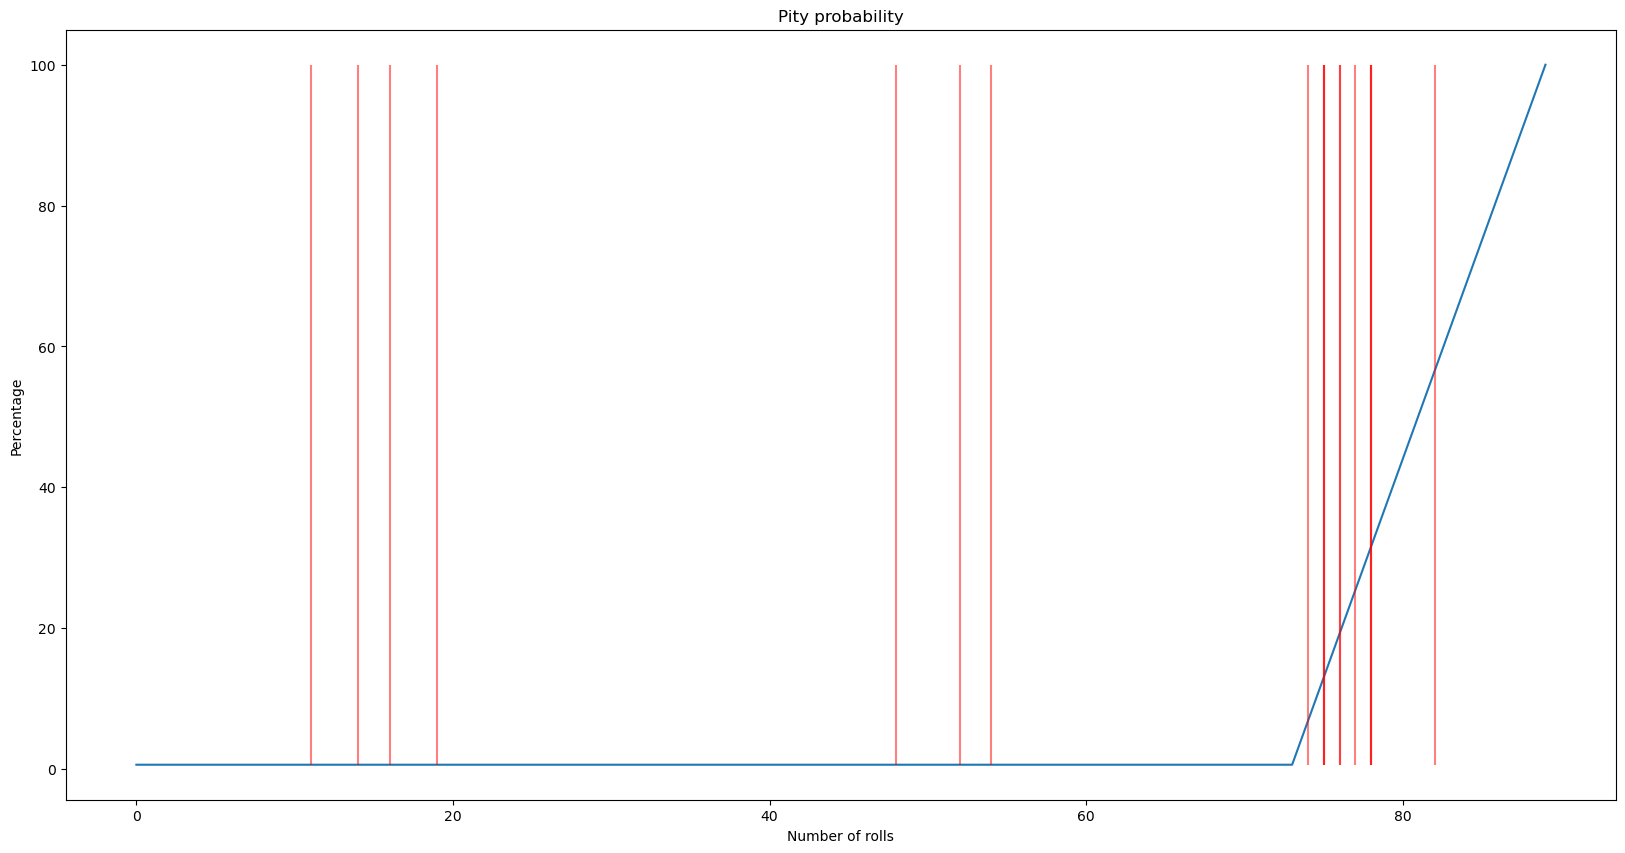

In [27]:
gachapct = np.zeros((90, 1))
for i in range(0,90):
    if i<74:
        gachapct[i] = 0.6
    elif i==89:
        gachapct[i] = 100
    else:
        gachapct[i] = 0.6 + (i-73) * 6.2125
        
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(gachapct)
ax.set_xlabel('Number of rolls')
ax.set_ylabel('Percentage')
ax.set_title('Pity probability')

# So now I get the pity of every 5-star here
limstat2 = limited[limited['Rarity'] == '★★★★★']
limstat2 = limstat2['Pity'].to_numpy()
print(limstat2)

# Plot them to graph with for loop
for i in range(len(limstat2)):
    ax.vlines(limstat2[i], ymin=0.6, ymax=100, color='red', alpha=0.5)


plt.show()